## 1. yfinance를 설치해서 주가데이터 가져오기

### 1. 야후파이낸스 라이브러리 실행

In [1]:
import yfinance as yf


### 2. 그래프 및 데이터프레임(엑셀형식의 데이터 작성) 지원 라이브러리 실행

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### 3. 데이터를 받아오는 코드

In [5]:
# 페이팔 주식 데이터를 가져옵니다.
start_date = '2015-09-01'
end_date = '2023-06-30'
ticker = 'PYPL'
data_pypl = yf.download(ticker, start=start_date, end=end_date)

# 데이터프레임으로 변환합니다.
df_pypl = pd.DataFrame(data_pypl['Close'])
df_pypl.columns = [ticker + 'price']
df_pypl.index.name = 'date'

# 시작일 이후의 데이터만 필터링합니다.
df_pypl = df_pypl[df_pypl.index >= '2015-09-01']


# 기준 금리 데이터 : 미리보기
df_pypl



[*********************100%%**********************]  1 of 1 completed


,PYPLprice
date,
2015-09-01,33.770000
2015-09-02,35.070000
2015-09-03,35.310001
2015-09-04,34.290001
2015-09-08,34.700001
...,...
2023-06-23,66.940002
2023-06-26,66.440002
2023-06-27,66.230003


(참고 데이터프레임)

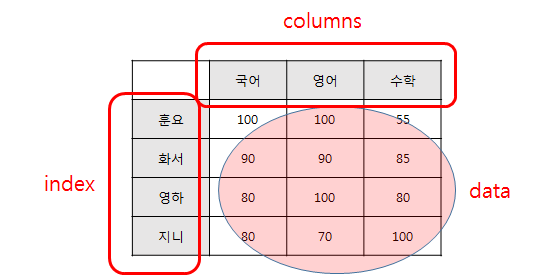

In [6]:
# 페이팔 데이터 출력
print(df_pypl)

            PYPLprice
date                 
2015-09-01  33.770000
2015-09-02  35.070000
2015-09-03  35.310001
2015-09-04  34.290001
2015-09-08  34.700001
...               ...
2023-06-23  66.940002
2023-06-26  66.440002
2023-06-27  66.230003
2023-06-28  66.029999
2023-06-29  65.860001

[1970 rows x 1 columns]


### 4. 데이터를 저장하는 코드

In [7]:
# 페이팔 주가 데이터를 CSV 파일로 저장

# CSV 파일로 저장
from google.colab import files

df_pypl.to_csv('pypl.csv', encoding='utf-8-sig')

# 파일을 다운로드합니다.
files.download('pypl.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###5. 차트를 그려주는 코드

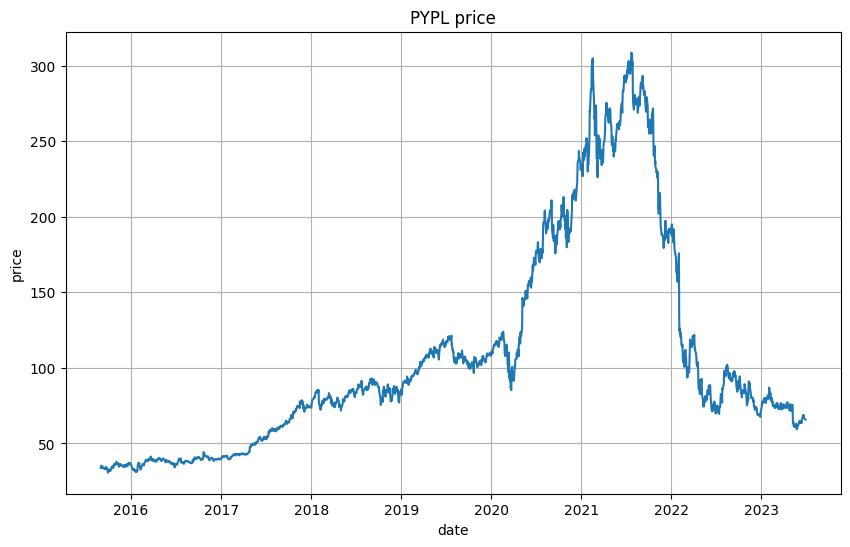

In [8]:
# 차트(그래프) 작성
plt.figure(figsize=(10, 6))
plt.plot(df_pypl)
plt.title(ticker + ' price')
plt.xlabel('date')
plt.ylabel('price')
plt.grid(True)
plt.show()

  ## 2. FRED (Federal Reserve Economic Data) API를 사용해서 데이터를 받기
  

### 1. Fred API를 Colab에 설치하기


In [ ]:
pip install fredapi


###2. API를 활용해서 데이터 받기

#### 2-1 데이터를 받아오는 코드

In [ ]:
#차트를 그리는 라이브러리 사용
#기준금리 데이터를 받아오는 라이브러리 사용
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred

# FRED API 키 입력
fred = Fred(api_key='b2182a80ba352b4be7486642fe6444c7')

# 기준금리 데이터를 가져옵니다. (시작일, 종료일)
data_interest = fred.get_series('DFF', start_date='2017-11-09', end_date='2023-06-30')


# 데이터프레임으로 변환합니다. (한글, 영어 모두 가능)
df_interest = pd.DataFrame(data_interest, columns=['기준금리'])
df_interest.index.name = '날짜'

# 시작일 이후의 데이터만 필터링합니다.
df_interest = df_interest[df_interest.index >= '2017-11-09']


# 기준 금리 데이터 : 미리보기
df_interest

,기준금리
날짜,
2017-11-09,1.16
2017-11-10,1.16
2017-11-11,1.16
2017-11-12,1.16
2017-11-13,1.16
...,...
2023-07-15,5.08
2023-07-16,5.08
2023-07-17,5.08


In [ ]:
# 기준금리 데이터 출력
print(df_interest)

            기준금리
날짜              
2017-11-09  1.16
2017-11-10  1.16
2017-11-11  1.16
2017-11-12  1.16
2017-11-13  1.16
...          ...
2023-07-15  5.08
2023-07-16  5.08
2023-07-17  5.08
2023-07-18  5.08
2023-07-19  5.08

[2079 rows x 1 columns]


#### 2-2 데이터를 저장하는 코드

In [ ]:
# 기준금리 데이터를 CSV 파일로 저장

# CSV 파일로 저장합니다.
from google.colab import files

df_interest.to_csv('interest.csv', encoding='utf-8-sig')

# 파일을 다운로드합니다.
files.download('interest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### 2-3 차트로 만들기

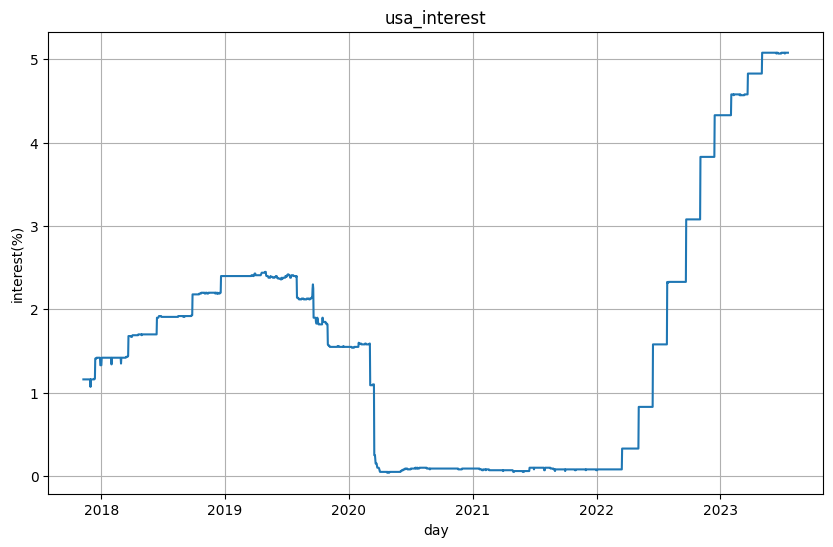

In [ ]:
# 차트를 그립니다.
plt.figure(figsize=(10, 6))
plt.plot(df_interest)  #df_interest 대신에 "data_interest"를 입력하면 어떻게 달라질까요?
plt.title('usa_interest')
plt.xlabel('day')
plt.ylabel('interest(%)')
plt.grid(True)
plt.show()